## Microsoft's Studios: Rise to the Surface


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

## business understanding top top explaining the goal and identify questions

diff sections
explain where the data comes from/source
prep explain cleaning
analysis/understanding - recs
conclusion section tying it back in to general overview/main question


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

- Eyeballing the data sets to see how many data points we have, what we need to change, and how we can merge the sets together to get a better understanding of our data.

In this set, we have the average ratings for 73,856 and the number of votes for movies/'tconst'.

In [2]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [3]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In this data set, we have the name of different employees in the industry and their profession and what titles they're known for. Unsure of how we can use the birth and death years. Will probably drop those two

In [4]:
imdb_name_basics = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In this data set, we have those same employees on 'nconst' with a more defined category of their position on each movie title 'tconst'. This set seems more useful to define what movies a certain person worked on to see the successs of a movie in relation to the artist.

In [5]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


This dataset has the names of the movies in relation to the title_id/'tconst'. We can use the 'title_id' renamed as 'tconst' to merge the sets together.

In [6]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [7]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)

This dataset has the directors and writers associated with each movie.

In [8]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


This data set has genre_ids as integers. We should try to find the associating genre with the ID. It also shows the popularity, releae date, average, and vote count for different movies.

In [9]:
#tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
#tmdb_movies = tmdb_movies.drop('id', axis=1)
#tmdb_movies.info()

This data set has movie titles with the production budget, domestic gross, and the worldwide gross. We can merge the movie titles with the ratings to see how the ratings of movies stack up against the budget and gross.

In [10]:
tnumbers_db_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz', index_col=0)
tnumbers_db_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [11]:
tnumbers_db_df.shape

(5782, 5)

## Merging IMDB Ratings Dataset with IMDB Titles

Here we are merging the IMDB name/titles set with the ratings and the directors and writers.

In [12]:
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [13]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [14]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [16]:
imdb_df = pd.merge(imdb_akas, imdb_ratings, on='tconst', how='left')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 27.8+ MB


In [17]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='left')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256"
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [18]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='left')
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,1.0,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,2.0,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,3.0,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,4.0,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841271,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,5.0,nm1567587,producer,producer,NaN,Iñigo Fernández Ostolaza,NaN,NaN,"editor,producer,director","tt0254455,tt7524694,tt9880178,tt0471112"
2841272,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm7279677,cinematographer,NaN,NaN,Javier de Usabel,NaN,NaN,"camera_department,cinematographer,art_department","tt4948838,tt7002576,tt8951078,tt4164866"
2841273,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,7.0,nm1341556,self,NaN,"[""Himself""]",Jaime Jaimes,NaN,NaN,director,"tt0358405,tt0451590"
2841274,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,8.0,nm4242087,self,NaN,"[""Herself""]",Amparo Malo,NaN,NaN,actress,"tt5159898,tt1805202"


In [19]:
imdb_df_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841276 entries, 0 to 2841275
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   tconst              object 
 1   ordering_x          int64  
 2   title               object 
 3   region              object 
 4   language            object 
 5   types               object 
 6   attributes          object 
 7   is_original_title   float64
 8   averagerating       float64
 9   numvotes            float64
 10  ordering_y          float64
 11  nconst              object 
 12  category            object 
 13  job                 object 
 14  characters          object 
 15  primary_name        object 
 16  birth_year          float64
 17  death_year          float64
 18  primary_profession  object 
 19  known_for_titles    object 
dtypes: float64(6), int64(1), object(13)
memory usage: 455.2+ MB


## Filtering out International and Duplicate Names


Below we can see we have multiple names for a single move as it was released in several different markets. We want to isolate and get a single movie title we're familiar with and use that one. We made the decision to subset the US region to get a standard US release title. We filtered out all the different types of release titles as well.

In [20]:
imdb_df['tconst'].value_counts()

tt2488496    61
tt1201607    55
tt2310332    55
tt1790809    53
tt2278871    53
             ..
tt1974297     1
tt4914364     1
tt1486189     1
tt3652610     1
tt4663976     1
Name: tconst, Length: 122302, dtype: int64

In [21]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['region'] == 'US']

Below we can see there's different titles for a single movie and we can filter those out.

In [22]:
imdb_df_people_df['attributes'].value_counts()

new title                 4673
informal English title    1996
literal English title     1548
complete title            1479
alternative spelling      1366
                          ... 
DVD menu title              10
third part title            10
first part title             6
X-rated version              6
first episode title          6
Name: attributes, Length: 64, dtype: int64

In [23]:
imdb_df_people_df['types'].value_counts()

imdbDisplay    30354
working        18793
alternative     8381
dvd             2123
festival        1957
tv               308
video            237
original          29
Name: types, dtype: int64

In [24]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'fake working title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'promotional title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'working']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'IMAX version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'poster title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != '3-D version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'director\'s cut']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'alternative spelling']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal alternative title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'long title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'alternative']

## Removing None and Low Votes

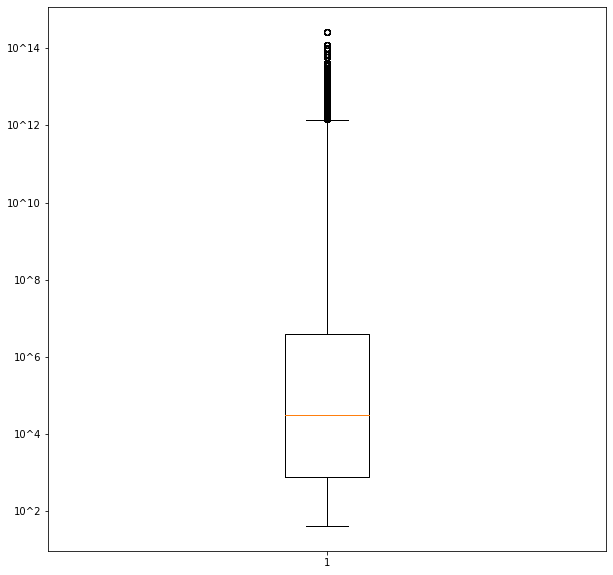

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(np.log(imdb_df_people_df['numvotes'].dropna()));
ax.set_yticks(np.arange(2, 15, 2))
ax.set_yticklabels(['10^2', '10^4', '10^6', '10^8', '10^10', '10^12', '10^14']);

We will filter out movies with less than 10^2 votes

In [26]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['numvotes'] >= 10000]

In [27]:
imdb_df_people_df = imdb_df_people_df.dropna(subset=['numvotes'])
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
200,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
201,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,1.0,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
202,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,2.0,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
203,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,3.0,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
204,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,4.0,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834216,tt6139732,29,Aladdin,US,en,NaN,NaN,0.0,7.4,57549.0,5.0,nm0005363,director,NaN,NaN,Guy Ritchie,1968.0,NaN,"director,producer,writer","tt0988045,tt1638355,tt0208092,tt0120735"
2834217,tt6139732,29,Aladdin,US,en,NaN,NaN,0.0,7.4,57549.0,6.0,nm0041864,writer,screenplay by,NaN,John August,1970.0,NaN,"writer,producer,soundtrack","tt1142977,tt0367594,tt0139239,tt0319061"
2834218,tt6139732,29,Aladdin,US,en,NaN,NaN,0.0,7.4,57549.0,7.0,nm3043818,producer,producer,NaN,Jonathan Eirich,NaN,NaN,"producer,executive","tt1241317,tt4624762,tt5079456,tt6139732"
2834219,tt6139732,29,Aladdin,US,en,NaN,NaN,0.0,7.4,57549.0,8.0,nm1469853,producer,producer,NaN,Dan Lin,1973.0,NaN,"producer,executive","tt0438488,tt1490017,tt4116284,tt0988045"


In [28]:
imdb_df_people_df = imdb_df_people_df[['tconst', 'title', 'averagerating', 'numvotes', 'category', 'primary_name', 'nconst']]

In [29]:
imdb_df_people_df

,tconst,title,averagerating,numvotes,category,primary_name,nconst
200,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777
201,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435
202,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171
203,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223
204,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460
...,...,...,...,...,...,...,...
2834216,tt6139732,Aladdin,7.4,57549.0,director,Guy Ritchie,nm0005363
2834217,tt6139732,Aladdin,7.4,57549.0,writer,John August,nm0041864
2834218,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818
2834219,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853


## Merging the IMDB dataset  To the Numbers Dataset

Renaming the movie column header to title to join tables together.

In [30]:
tnumbers_db_df.rename(columns = {'movie': 'title'}, inplace=True)
tnumbers_db_df

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [31]:
imdb_tndb = pd.merge(imdb_df_people_df, tnumbers_db_df, on='title', how='inner')
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
12008,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"
12009,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
12010,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"


## Changing the data type of monetary values from string into float

In [32]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12012 entries, 0 to 12011
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             12012 non-null  object 
 1   title              12012 non-null  object 
 2   averagerating      12012 non-null  float64
 3   numvotes           12012 non-null  float64
 4   category           12012 non-null  object 
 5   primary_name       12012 non-null  object 
 6   nconst             12012 non-null  object 
 7   release_date       12012 non-null  object 
 8   production_budget  12012 non-null  object 
 9   domestic_gross     12012 non-null  object 
 10  worldwide_gross    12012 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.1+ MB


In [33]:
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace(',','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace('$','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].astype(float)

In [34]:
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace(',','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace('$','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].astype(float)

In [35]:
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace(',','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace('$','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].astype(float)

## Adding Profit Margin Column and ratio of Production Budget to Worldwide Gross


In [36]:
imdb_tndb['Profit_Margin'] = ((imdb_tndb['worldwide_gross'] - imdb_tndb['production_budget']) / imdb_tndb['worldwide_gross'])*100
imdb_tndb['ratio_budget_gross'] = (imdb_tndb['production_budget'] / imdb_tndb['worldwide_gross'])
imdb_tndb['ratio_budget_gross_%'] = imdb_tndb['ratio_budget_gross']*100

## Filtering out rows with domestic and worldwide gross is zero

In [37]:
imdb_tndb = imdb_tndb[imdb_tndb['worldwide_gross'] > 0]
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12008,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136
12009,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12010,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136


In [38]:
imdb_tndb = imdb_tndb[imdb_tndb['domestic_gross'] > 0]
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,86.960647,0.130394,13.039353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12008,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136
12009,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,94.444998,0.055550,5.555002
12010,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,70.608864,0.293911,29.391136


## Filtering out movies to only have a time period since 1960.

In [39]:
imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)

<ipython-input-39-2033d2b2549f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)


In [40]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11685 entries, 0 to 12011
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                11685 non-null  object        
 1   title                 11685 non-null  object        
 2   averagerating         11685 non-null  float64       
 3   numvotes              11685 non-null  float64       
 4   category              11685 non-null  object        
 5   primary_name          11685 non-null  object        
 6   nconst                11685 non-null  object        
 7   release_date          11685 non-null  object        
 8   production_budget     11685 non-null  float64       
 9   domestic_gross        11685 non-null  float64       
 10  worldwide_gross       11685 non-null  float64       
 11  Profit_Margin         11685 non-null  float64       
 12  ratio_budget_gross    11685 non-null  float64       
 13  ratio_budget_gro

In [41]:
imdb_tndb = imdb_tndb[imdb_tndb['release dates'] >= '1960-01-01']

In [42]:
imdb_tndb['years'] = imdb_tndb['release dates'].dt.year

<ipython-input-42-a69c17bf146d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tndb['years'] = imdb_tndb['release dates'].dt.year


## Filtering out Directors and Performers

In [43]:
directors = imdb_tndb[imdb_tndb['category'] == 'director']


In [44]:
performers = imdb_tndb[(imdb_tndb['category'] == 'actor') | (imdb_tndb['category'] == 'actress')]

We sort the set descending by the average rating to get the higher rating of the movie for each 'tconst' and remove any additional duplicates.

In [45]:
directors = directors.sort_values(by='tconst', ascending=False)
directors.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

In [46]:
performers = performers.sort_values(by='averagerating', ascending=False)
performers.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

## Initial Exploration of Correlations and Visualizations

In [47]:
directors.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
averagerating,1.000000,0.527984,0.191589,0.321435,0.302006,0.082847,-0.082847,-0.082847,0.095987
numvotes,0.527984,1.000000,0.490776,0.605582,0.592399,0.058988,-0.058988,-0.058988,-0.064696
production_budget,0.191589,0.490776,1.000000,0.698368,0.773030,0.059454,-0.059454,-0.059454,0.106973
domestic_gross,0.321435,0.605582,0.698368,1.000000,0.944220,0.065721,-0.065721,-0.065721,0.094591
worldwide_gross,0.302006,0.592399,0.773030,0.944220,1.000000,0.059068,-0.059068,-0.059068,0.116423
Profit_Margin,0.082847,0.058988,0.059454,0.065721,0.059068,1.000000,-1.000000,-1.000000,0.021962
ratio_budget_gross,-0.082847,-0.058988,-0.059454,-0.065721,-0.059068,-1.000000,1.000000,1.000000,-0.021962
ratio_budget_gross_%,-0.082847,-0.058988,-0.059454,-0.065721,-0.059068,-1.000000,1.000000,1.000000,-0.021962
years,0.095987,-0.064696,0.106973,0.094591,0.116423,0.021962,-0.021962,-0.021962,1.000000


In [48]:
performers.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
averagerating,1.000000,0.527527,0.140938,0.287418,0.268537,0.087923,-0.087923,-0.087923,0.076911
numvotes,0.527527,1.000000,0.475946,0.605949,0.597746,0.056499,-0.056499,-0.056499,-0.063417
production_budget,0.140938,0.475946,1.000000,0.680013,0.766533,0.054818,-0.054818,-0.054818,0.086920
domestic_gross,0.287418,0.605949,0.680013,1.000000,0.940387,0.062992,-0.062992,-0.062992,0.055832
worldwide_gross,0.268537,0.597746,0.766533,0.940387,1.000000,0.056522,-0.056522,-0.056522,0.084474
Profit_Margin,0.087923,0.056499,0.054818,0.062992,0.056522,1.000000,-1.000000,-1.000000,0.013952
ratio_budget_gross,-0.087923,-0.056499,-0.054818,-0.062992,-0.056522,-1.000000,1.000000,1.000000,-0.013952
ratio_budget_gross_%,-0.087923,-0.056499,-0.054818,-0.062992,-0.056522,-1.000000,1.000000,1.000000,-0.013952
years,0.076911,-0.063417,0.086920,0.055832,0.084474,0.013952,-0.013952,-0.013952,1.000000


Below, we got the average of each director by grouping all the movies done by a director and taking the average and sorted from highest rating to lowest rating

In [49]:
director_avg = directors.groupby('primary_name').mean()

director_avg.sort_values(by='averagerating', ascending=False)

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
primary_name,,,,,,,,,
Nitesh Tiwari,8.500000,1.236380e+05,9.500000e+06,12391761.0,2.946546e+08,96.775886,0.032241,3.224114,2016.000000
Ron Fricke,8.500000,2.972500e+04,4.000000e+06,2672413.0,5.966671e+06,32.960943,0.670391,67.039057,2012.000000
Christopher Nolan,8.433333,1.202327e+06,1.583333e+08,223554123.0,6.672471e+08,75.359975,0.246400,24.640025,2013.666667
Adrian Molina,8.400000,2.771940e+05,1.750000e+08,209726015.0,7.980081e+08,78.070398,0.219296,21.929602,2017.000000
Lee Unkrich,8.350000,4.797060e+05,1.875000e+08,312365447.5,9.334438e+08,79.679608,0.203204,20.320392,2013.500000
...,...,...,...,...,...,...,...,...,...
Aaron Seltzer,3.400000,4.398400e+04,2.000000e+07,36661504.0,8.142499e+07,75.437516,0.245625,24.562484,2010.000000
Jason Friedberg,3.400000,4.398400e+04,2.000000e+07,36661504.0,8.142499e+07,75.437516,0.245625,24.562484,2010.000000
Tom Brady,3.300000,1.064800e+04,1.000000e+07,2529395.0,2.529395e+06,-295.351458,3.953515,395.351458,2011.000000


In [50]:
#director_avg = director_avg[director_avg['ratio_production_to_gross'] < 1.00]


In [51]:
director_avg.sort_values(by='averagerating', ascending=False, inplace=True)
director_avg[:15]

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
primary_name,,,,,,,,,
Nitesh Tiwari,8.500000,1.236380e+05,9.500000e+06,12391761.0,2.946546e+08,96.775886,0.032241,3.224114,2016.000000
Ron Fricke,8.500000,2.972500e+04,4.000000e+06,2672413.0,5.966671e+06,32.960943,0.670391,67.039057,2012.000000
Christopher Nolan,8.433333,1.202327e+06,1.583333e+08,223554123.0,6.672471e+08,75.359975,0.246400,24.640025,2013.666667
Adrian Molina,8.400000,2.771940e+05,1.750000e+08,209726015.0,7.980081e+08,78.070398,0.219296,21.929602,2017.000000
Lee Unkrich,8.350000,4.797060e+05,1.875000e+08,312365447.5,9.334438e+08,79.679608,0.203204,20.320392,2013.500000
Charles Ferguson,8.300000,6.530400e+04,2.000000e+06,4311834.0,7.799257e+06,74.356532,0.256435,25.643468,2010.000000
Lenny Abrahamson,8.200000,3.167910e+05,1.300000e+07,14677674.0,3.626278e+07,64.150573,0.358494,35.849427,2015.000000
Pete Docter,8.200000,5.361810e+05,1.750000e+08,356461711.0,8.542360e+08,79.513858,0.204861,20.486142,2015.000000
Martin McDonagh,8.200000,3.440470e+05,1.200000e+07,54513740.0,1.601919e+08,92.508985,0.074910,7.491015,2017.000000


In [52]:
#director_avg.corr()

We can observe a slight positive correlation between the average rating of the director and the ratio of production budget to gross. This is a good thing as the lower the ratio production to worldwide, the more profitable. This makes our correlation negative.

In [53]:
directors_gross_df = director_avg[director_avg['worldwide_gross'] > 150000000]

In [54]:
directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)


<ipython-input-54-c04046fcdfaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)


In [55]:
top_10_directors = directors_gross_df[:10]
top_10_directors

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
primary_name,,,,,,,,,
Nitesh Tiwari,8.500000,1.236380e+05,9.500000e+06,12391761.0,2.946546e+08,96.775886,0.032241,3.224114,2016.000000
Christopher Nolan,8.433333,1.202327e+06,1.583333e+08,223554123.0,6.672471e+08,75.359975,0.246400,24.640025,2013.666667
Adrian Molina,8.400000,2.771940e+05,1.750000e+08,209726015.0,7.980081e+08,78.070398,0.219296,21.929602,2017.000000
Lee Unkrich,8.350000,4.797060e+05,1.875000e+08,312365447.5,9.334438e+08,79.679608,0.203204,20.320392,2013.500000
Pete Docter,8.200000,5.361810e+05,1.750000e+08,356461711.0,8.542360e+08,79.513858,0.204861,20.486142,2015.000000
Ronnie Del Carmen,8.200000,5.361810e+05,1.750000e+08,356461711.0,8.542360e+08,79.513858,0.204861,20.486142,2015.000000
Martin McDonagh,8.200000,3.440470e+05,1.200000e+07,54513740.0,1.601919e+08,92.508985,0.074910,7.491015,2017.000000
Quentin Tarantino,8.100000,8.231855e+05,8.100000e+07,108461425.0,2.989066e+08,67.922527,0.320775,32.077473,2013.500000
George Miller,8.100000,7.809100e+05,1.500000e+08,153636354.0,3.700980e+08,59.470197,0.405298,40.529803,2015.000000


In [56]:
#directors_gross_df['worldwide_gross'].index[:10]

In [57]:
director_budget = top_10_directors['production_budget'].values[:10]
top_10_directors_names = top_10_directors['production_budget'].index[:10]
directors_gross = top_10_directors['worldwide_gross'].values[:10]

<ipython-input-58-52e2f1765b0b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18);


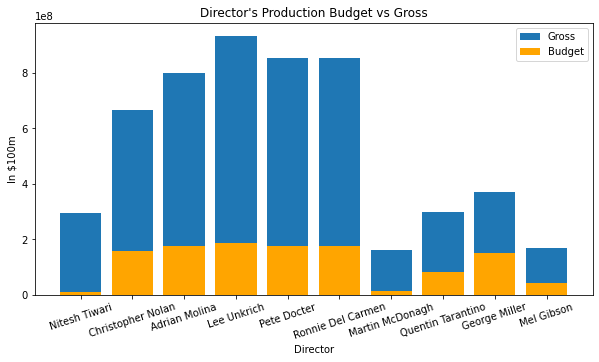

In [58]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director')
ax.set_ylabel('In $100m')
ax.set_title('Director\'s Production Budget vs Gross')
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_figure',bbox_inches='tight')

<ipython-input-91-5144bd2a007a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18)


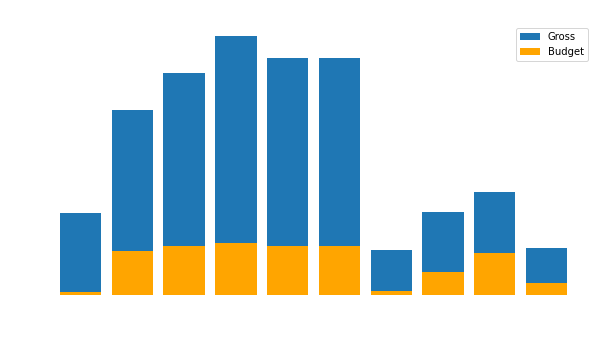

In [91]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director')
ax.set_ylabel('In $100m')
ax.set_title('Director\'s Production Budget vs Gross', color='white')
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white');
plt.savefig('../images/Director_avg_budget_vs_avg_gross_figure_dark',bbox_inches='tight', transparent=True)

<ipython-input-60-c30e97e1a72f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18);


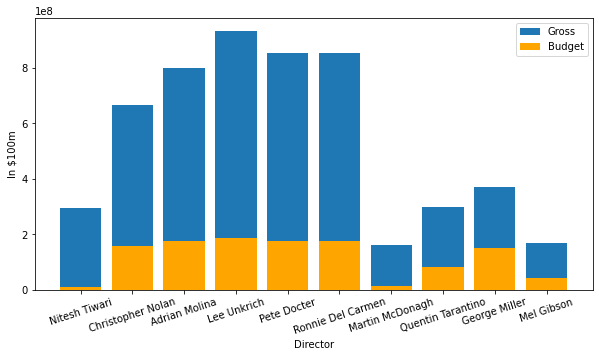

In [60]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.style.use=('use_dark_background')
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director')
ax.set_ylabel('In $100m')
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_notitle_ppt',bbox_inches='tight')

In [61]:
#director_index = director_avg['Profit_Margin'].index[:10]
#director_index

In [62]:
#director_values = director_avg['Profit_Margin'].values[:10]
#director_values

In [63]:
#director_budget = director_avg['ratio_budget_gross_%'].values[:10]

In [64]:
#fig, ax = plt.subplots(figsize=(10, 5))
#ax.bar(director_index, director_values)
#ax.bar(director_index, director_budget, color='orange')
#ax.set_xticklabels(director_index, rotation=90)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Director\'s Profit Margin\'s and Budget')
#ax.set_title('Director\'s Profit vs Budget');

In [65]:
#fig, ax = plt.subplots()
#ax.scatter(director_avg['averagerating'], director_avg['ratio_budget_gross_%'], alpha=.3)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Ratio of Production to Gross')
#ax.set_title('Director Avg Rating vs Ratio of Production to Gross');

In [66]:
#fig, ax = plt.subplots()
#ax.scatter(director_avg['worldwide_gross'], director_avg['averagerating'],  alpha=.3)
#ax.set_xlabel('Director Average Rating')
#ax.set_ylabel('Worldwide Gross')
#ax.set_title('Director Avg Rating vs Worldwide to Gross');

In [67]:
performers_count = performers.groupby('primary_name').count()
performers_count.sort_values(by='title', ascending=False, inplace=True)
performers_count[95:105]

,tconst,title,averagerating,numvotes,category,nconst,release_date,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,release dates,years
primary_name,,,,,,,,,,,,,,,
Michelle Williams,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Selena Gomez,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Anthony Hopkins,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Colin Farrell,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Samuel L. Jackson,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
George Clooney,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Kevin Costner,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Aaron Eckhart,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
James Marsden,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


look at how many movies they've starred in since our start date. Depict trends for each actor. If trend goes down, they're losing it or if they're on the rise. using movie ratings as indicator

In [68]:
#dwayne_johnson = performers[performers['primary_name'] == 'Dwayne Johnson']
#dwayne_johnson.sort_values(by='release dates', ascending=True, inplace=True)

In [69]:
#fig, ax = plt.subplots()
#ax.plot(dwayne_johnson['release dates'], dwayne_johnson['averagerating'])

In [70]:
actor_male = performers[performers['primary_name'] == 'Chris Evans']
actor_male.sort_values(by='release dates', ascending=True, inplace=True)

<ipython-input-70-e4f5d7320107>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_male.sort_values(by='release dates', ascending=True, inplace=True)


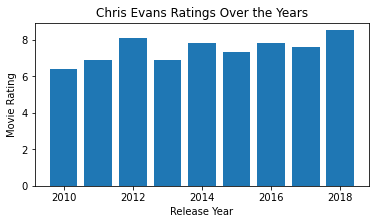

In [71]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year')
ax.set_ylabel('Movie Rating')
ax.set_title('Chris Evans Ratings Over the Years');
plt.savefig('../images/Chris_evans_ratings_over_years',bbox_inches='tight')

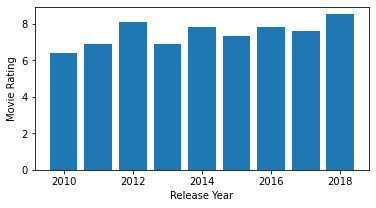

In [72]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year')
ax.set_ylabel('Movie Rating');
plt.savefig('../images/Chris_evans_ratings_over_years_notitle_ppt',bbox_inches='tight')

In [73]:
actor_female = performers[performers['primary_name'] == 'Jennifer Garner']
actor_female.sort_values(by='release dates', ascending=True, inplace=True)

<ipython-input-73-99ef68955b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_female.sort_values(by='release dates', ascending=True, inplace=True)


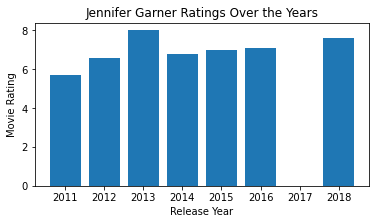

In [74]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year')
ax.set_ylabel('Movie Rating')
ax.set_title('Jennifer Garner Ratings Over the Years');
plt.savefig('../images/Jennifer_garner_ratings_over_years',bbox_inches='tight')

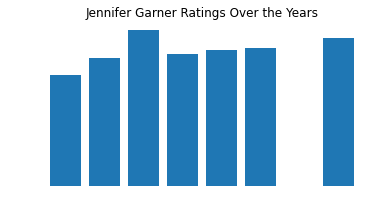

In [88]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year')
ax.set_ylabel('Movie Rating')
ax.set_title('Jennifer Garner Ratings Over the Years')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
plt.savefig('../images/Jennifer_garner_ratings_over_years_dark',bbox_inches='tight', transparent=True)

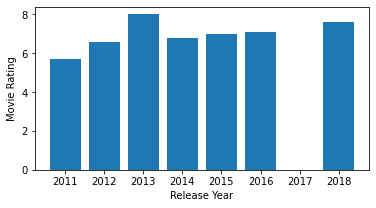

In [75]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year')
ax.set_ylabel('Movie Rating');
plt.savefig('../images/Jennifer_garner_ratings_over_years_notitle_ppt',bbox_inches='tight')

In [76]:
performers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 613 to 1173
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                4313 non-null   object        
 1   title                 4313 non-null   object        
 2   averagerating         4313 non-null   float64       
 3   numvotes              4313 non-null   float64       
 4   category              4313 non-null   object        
 5   primary_name          4313 non-null   object        
 6   nconst                4313 non-null   object        
 7   release_date          4313 non-null   object        
 8   production_budget     4313 non-null   float64       
 9   domestic_gross        4313 non-null   float64       
 10  worldwide_gross       4313 non-null   float64       
 11  Profit_Margin         4313 non-null   float64       
 12  ratio_budget_gross    4313 non-null   float64       
 13  ratio_budget_gro

In [77]:
actor_ratings = performers.pivot_table(index='primary_name', columns='years', values='averagerating', aggfunc='mean')

In [78]:
actor_ratings.index

Index(['50 Cent', 'AJ Bowen', 'AJ Michalka', 'Aamir Khan', 'Aaron Burns',
       'Aaron Eckhart', 'Aaron Paul', 'Aaron Taylor-Johnson', 'Aasif Mandvi',
       'Abbie Cornish',
       ...
       'Zoe Kazan', 'Zoe Levin', 'Zoe Saldana', 'Zoey Deutch',
       'Zooey Deschanel', 'Zoë Kravitz', 'Zulay Henao', 'Émilie Leclerc',
       'Ólafur Darri Ólafsson', 'Óscar Jaenada'],
      dtype='object', name='primary_name', length=1989)

In [79]:
Matthew_McConaughey = actor_ratings[(actor_ratings.index.get_level_values('primary_name') == "Matthew McConaughey")]
Matthew_McConaughey

years,1974,1976,1978,1981,1982,1984,1986,1987,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
primary_name,,,,,,,,,,,,,,,,,,,,,
Matthew McConaughey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.3,6.35,7.866667,8.6,NaN,7.266667,5.7,6.4,NaN


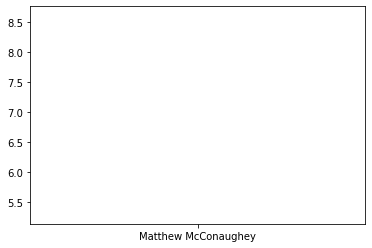

In [80]:
fig, ax = plt.subplots()
ax.plot(Matthew_McConaughey);

In [81]:
performers_avg = performers.groupby('primary_name').mean()

In [82]:
#performers_avg = performers_avg[performers_avg['ratio_production_to_gross'] < 1.00]
performers_avg.sort_values(by='averagerating', ascending=False, inplace=True)

In [83]:
performers_avg[25:50]

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
primary_name,,,,,,,,,
Michael Kenneth Williams,8.100000,577301.000000,2.000000e+07,5.667199e+07,181025343.0,88.951823,0.110482,11.048177,2013.000000
Mathieu Amalric,8.100000,633604.000000,3.100000e+07,5.907602e+07,163981261.0,81.095401,0.189046,18.904599,2014.000000
Takeshi Kusao,8.000000,16465.000000,8.500000e+06,3.037676e+07,122747755.0,93.075230,0.069248,6.924770,2019.000000
Kôichi Yamadera,8.000000,16465.000000,8.500000e+06,3.037676e+07,122747755.0,93.075230,0.069248,6.924770,2019.000000
Toshio Furukawa,8.000000,16465.000000,8.500000e+06,3.037676e+07,122747755.0,93.075230,0.069248,6.924770,2019.000000
Izabela Vidovic,8.000000,111632.000000,2.000000e+07,1.324228e+08,304604712.0,93.434113,0.065659,6.565887,2017.000000
Ed Skrein,8.000000,820847.000000,5.800000e+07,3.630707e+08,801025593.0,92.759283,0.072407,7.240717,2016.000000
Ryô Horikawa,8.000000,16465.000000,8.500000e+06,3.037676e+07,122747755.0,93.075230,0.069248,6.924770,2019.000000
Masako Nozawa,8.000000,16465.000000,8.500000e+06,3.037676e+07,122747755.0,93.075230,0.069248,6.924770,2019.000000


In [84]:
performers_avg.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
averagerating,1.000000,0.479874,0.133086,0.243742,0.233465,0.119078,-0.119078,-0.119078,0.086542
numvotes,0.479874,1.000000,0.494212,0.576529,0.595550,0.071821,-0.071821,-0.071821,-0.049598
production_budget,0.133086,0.494212,1.000000,0.669608,0.755310,0.066915,-0.066915,-0.066915,0.051657
domestic_gross,0.243742,0.576529,0.669608,1.000000,0.934920,0.074684,-0.074684,-0.074684,0.050238
worldwide_gross,0.233465,0.595550,0.755310,0.934920,1.000000,0.067185,-0.067185,-0.067185,0.064763
Profit_Margin,0.119078,0.071821,0.066915,0.074684,0.067185,1.000000,-1.000000,-1.000000,0.004918
ratio_budget_gross,-0.119078,-0.071821,-0.066915,-0.074684,-0.067185,-1.000000,1.000000,1.000000,-0.004918
ratio_budget_gross_%,-0.119078,-0.071821,-0.066915,-0.074684,-0.067185,-1.000000,1.000000,1.000000,-0.004918
years,0.086542,-0.049598,0.051657,0.050238,0.064763,0.004918,-0.004918,-0.004918,1.000000


Similarly, we can observe a slight negative correlation between the average rating of the performers and the ratio of production budget to gross. This is a good thing as the smaller the ratio  the production to worldwide is, the more profitable the movie. This makes our correlation negative.

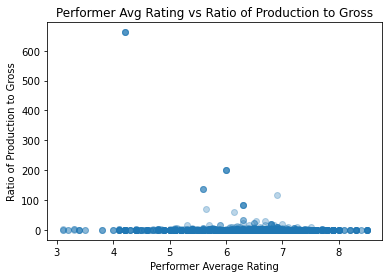

In [85]:
fig, ax = plt.subplots()
ax.scatter(performers_avg['averagerating'], performers_avg['ratio_budget_gross'], alpha=.3)
ax.set_xlabel('Performer Average Rating')
ax.set_ylabel('Ratio of Production to Gross')
ax.set_title('Performer Avg Rating vs Ratio of Production to Gross');

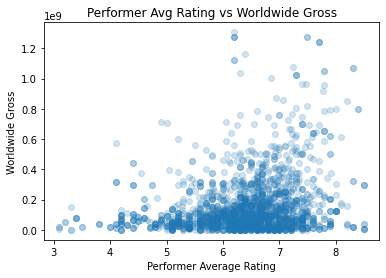

In [86]:
fig, ax = plt.subplots()
ax.scatter(performers_avg['averagerating'], performers_avg['worldwide_gross'], alpha=.2)
ax.set_xlabel('Performer Average Rating')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Performer Avg Rating vs Worldwide Gross');

see correlation between $$ spent and return - scatter

In the plot below, we can see that there's a slightly positive correlation between average rating and worldwide gross. We can also observe that many low budget

list of top actors

In [87]:
#def actor_info(actor):
#    actor_name = performers[performers['primary_name'] == 'actor']
#    actor_name.sort_values(by='release dates', ascending=True, inplace=True)
#    fig, ax = plt.subplots()
 #   return ax.plot(actor_name['release dates'], actor_name['averagerating'])